In [1]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df = pd.read_csv(r"C:\Users\aydin\OneDrive\Desktop\veri bilimi\DataScience_salaries_2024.csv")

In [5]:
def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("\n##################### Columns #####################")
    print(dataframe.columns)
    print("\n##################### Info #####################")
    dataframe.info()
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head())
    print("##################### Tail #####################")
    print(dataframe.tail())
    print("##################### NA #####################")
    print(dataframe.isnull().sum())

In [8]:
check_df(df)

##################### Shape #####################
(14838, 11)

##################### Columns #####################
Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

##################### Info #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio

In [9]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,14838.000,14838.000,14838.000,14838.000
mean,2023.139,165022.719,149874.719,32.760
std,0.701,356235.427,69009.181,46.488
min,2020.000,14000.000,15000.000,0.000
25%,2023.000,102100.000,102000.000,0.000
50%,2023.000,142200.000,141300.000,0.000
75%,2024.000,187500.000,185900.000,100.000
max,2024.000,30400000.000,800000.000,100.000


In [17]:
def column_detection(dataframe: pd.DataFrame, cat_th: int = 10, car_th: int = 20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                       dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                    dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print("\n##################### Categoric #####################")
    print(cat_cols)
    print("\n##################### Numeric #####################")
    print(num_cols)
    print("\n##################### Categoric But Cardinal #####################")
    print(cat_but_car)
    print("\n##################### Numeric But Categoric #####################")
    print(num_but_cat)
    print("\n##################### Columns Overview #####################")
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car, num_but_cat

In [18]:
cat_cols, num_cols, cat_but_car, num_but_cat = column_detection(df)


##################### Categoric #####################
['experience_level', 'employment_type', 'company_size', 'work_year', 'remote_ratio']

##################### Numeric #####################
['salary', 'salary_in_usd']

##################### Categoric But Cardinal #####################
['job_title', 'salary_currency', 'employee_residence', 'company_location']

##################### Numeric But Categoric #####################
['work_year', 'remote_ratio']

##################### Columns Overview #####################
Observations: 14838
Variables: 11
cat_cols: 5
num_cols: 2
cat_but_car: 4
num_but_cat: 2


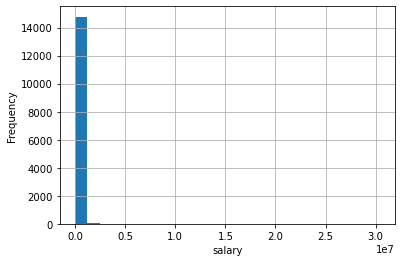

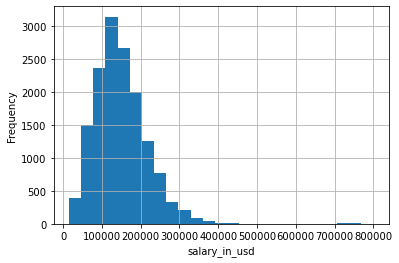

In [37]:
def cat_summary(dataframe, col_name, plot=True):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)


for col in cat_cols:
    cat_summary(df, col)


def hist_num_columns_show(dataframe, num_column):
    dataframe[num_column].hist(bins=25)
    plt.xlabel(num_column)
    plt.ylabel("Frequency")
    plt.show(block=True)


for num_col in num_cols:
    hist_num_columns_show(df, num_col)

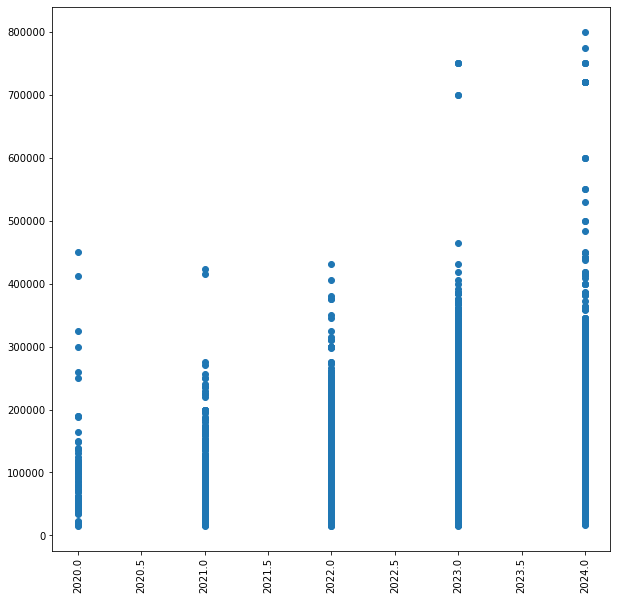

In [68]:
plt.figure(figsize=(10,10))
plt.scatter('work_year',"salary_in_usd" , data=df)
plt.xticks(rotation=90)
plt.show()

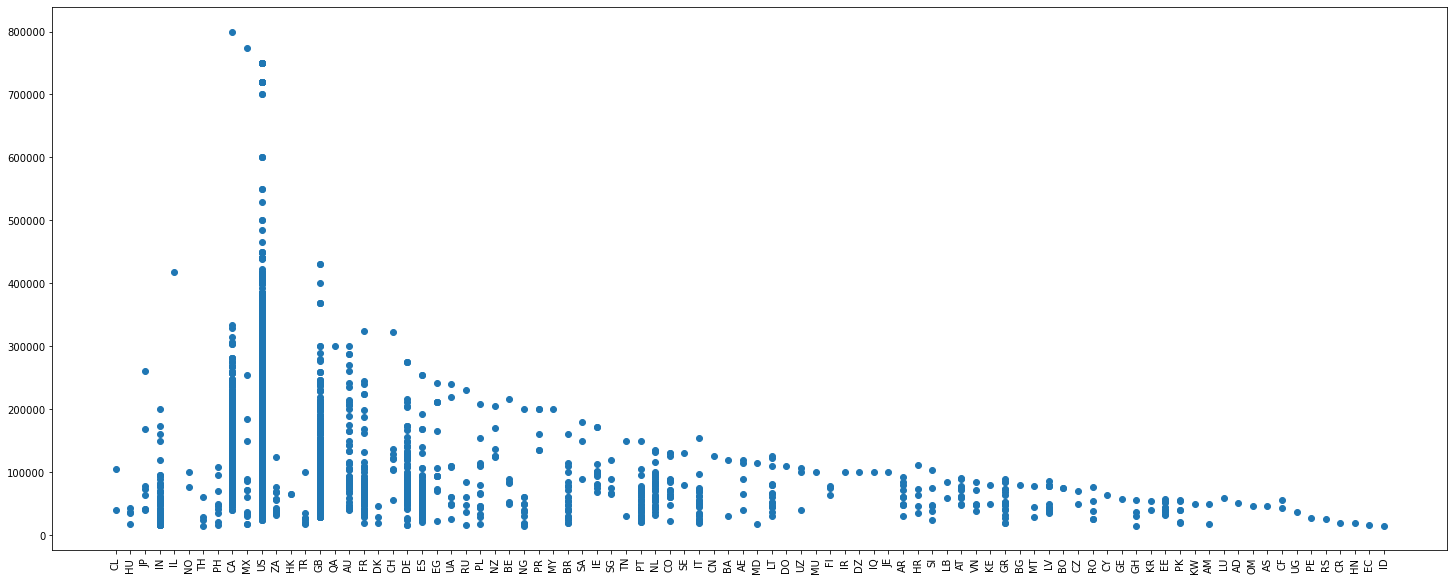

In [52]:
plt.figure(figsize=(25,10))
plt.scatter('employee_residence',"salary_in_usd" , data=df)
plt.xticks(rotation=90)
plt.show()

# Bu grafik bize data science üstüne çalışanları ekonomisi güçlü ülkelerde daha önemli olduğunu gösteriyor

In [58]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64